## **Phase 1: Data Loading & Initial Exploration**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.combine import SMOTEENN, SMOTETomek

In [4]:
# Load dataset
# Note: df is short for dataframe for pandas dataframe
df = pd.read_csv("..\data\WA_Fn-UseC_-Telco-Customer-Churn.csv")
# See the first 5 rows
df.head()

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\we\AppData\Local\Temp\ipykernel_48040\3834862360.py:3: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv("..\data\WA_Fn-UseC_-Telco-Customer-Churn.csv")


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# See how many rows and columns
df.shape

(7043, 21)

In [6]:
# See column names and types
df.info()

# Notes:
# Dtype => Data Type
# object = Text (strings) or mixed data. Pandas uses object for things that aren’t purely numbers.
# Non-Null Count => Number of non-null values in the column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## **Phase 2: Data Quality Assessment**

In [7]:
#  Count missing values in each column
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
# Check for duplicate customers
df.duplicated().sum()

np.int64(0)

In [9]:
# See current data types
df.dtypes

# Conclusion:
# - TotalCharges is object, not float

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## **Phase 3: Data Cleaning**

In [10]:
# Convert 'TotalCharges' to numeric, some rows may be blank
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Now check again for missing values
df.isnull().sum()

# Drop rows with missing TotalCharges
df = df.dropna()

# Check shapes
df.shape

(7032, 21)

## **Phase 4: Data Visualization & Exploration**

Text(0.5, 1.0, 'Churn by Contract Type')

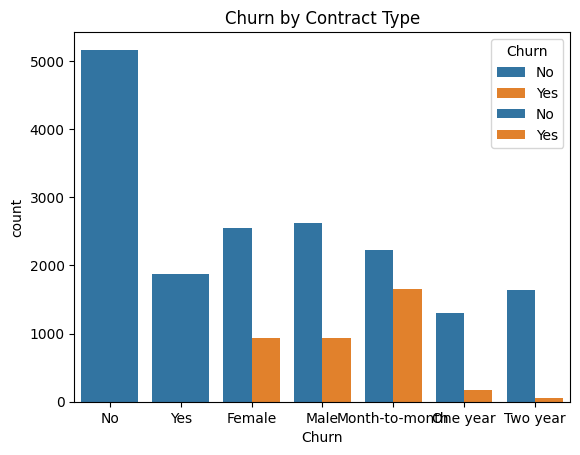

In [16]:
# Plot churn count
sns.countplot(x='Churn', data=df)
plt.title("Churn Count")

# Plot churn by gender
sns.countplot(x='gender', hue='Churn', data=df)
plt.title("Churn by Gender")

# Plot churn by Contract type
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn by Contract Type")

In [17]:
# # Function to evaluate model performance
# def evaluate_model(model, X_test, y_test, model_name):
#     """Evaluate model and print comprehensive metrics"""
#     y_pred = model.predict(X_test)
#     y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
#     print(f"\n=== {model_name} Performance ===")
#     print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
#     print(f"Precision: {precision_score(y_test, y_pred):.4f}")
#     print(f"Recall: {recall_score(y_test, y_pred):.4f}")
#     print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    
#     if y_pred_proba is not None:
#         print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")
    
#     print("\nConfusion Matrix:")
#     print(confusion_matrix(y_test, y_pred))
#     print("\nClassification Report:")
#     print(classification_report(y_test, y_pred))
    
#     return y_pred




In [18]:
# # Model comparison visualization
# fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# # Confusion matrix for Logistic Regression
# cm_lr = confusion_matrix(y_test, lr_predictions)
# sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0])
# axes[0].set_title('Logistic Regression - Confusion Matrix')
# axes[0].set_xlabel('Predicted')
# axes[0].set_ylabel('Actual')

# # Confusion matrix for SVM
# cm_svm = confusion_matrix(y_test, svm_predictions)
# sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens', ax=axes[1])
# axes[1].set_title('SVM - Confusion Matrix')
# axes[1].set_xlabel('Predicted')
# axes[1].set_ylabel('Actual')

# plt.tight_layout()
# plt.show()

# # Performance comparison summary
# models_performance = {
#     'Model': ['Logistic Regression', 'SVM'],
#     'Accuracy': [
#         accuracy_score(y_test, lr_predictions),
#         accuracy_score(y_test, svm_predictions)
#     ],
#     'Precision': [
#         precision_score(y_test, lr_predictions),
#         precision_score(y_test, svm_predictions)
#     ],
#     'Recall': [
#         recall_score(y_test, lr_predictions),
#         recall_score(y_test, svm_predictions)
#     ],
#     'F1-Score': [
#         f1_score(y_test, lr_predictions),
#         f1_score(y_test, svm_predictions)
#     ]
# }

# comparison_df = pd.DataFrame(models_performance)
# print("\n=== Model Performance Comparison ===")
# print(comparison_df.round(4))


## **Phase 5: Data Preprocessing**

In [11]:
# Drop customerID (not useful)
df.drop(['customerID'], axis=1, inplace=True)


In [12]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(num_cols)
print(categorical_cols)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [13]:
onehot_cols =['InternetService','OnlineSecurity','DeviceProtection','TechSupport','PaymentMethod']
binary_cols =['Dependents','Contract','PaperlessBilling']

# Numerical pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

# OneHot pipeline (for nominal categorical features)
onehot_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot_encoding', OneHotEncoder())
])

# Binary/Ordinal pipeline
binary_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('binary_encoding', OrdinalEncoder())
])

# Column transformer
processing = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('onehot', onehot_pipeline, onehot_cols),
    ('ordinal', binary_pipeline, binary_cols)
], remainder='passthrough')

processing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['SeniorCitizen', 'tenure', 'MonthlyCharges',
                                  'TotalCharges']),
                                ('onehot',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('one_hot_encoding',
                                                  OneHotEncoder())]),
                                 ['InternetService', 'OnlineSecurity',
                                  'DeviceProtection', 'TechSupport',
                                  'PaymentMethod']),
                                ('ordinal',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('binary_encoding',
                                                  OrdinalEncoder())]),
                                 ['Dependents', 'Contract',
                                  'PaperlessBilling'])])

In [14]:
# Separate What You Want to Predict
X = df.drop('Churn', axis=1)  # Everything EXCEPT 'Churn' column
y = df['Churn']               # ONLY the 'Churn' column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train_cleaned = processing.fit_transform(X_train)
X_test_cleaned = processing.transform(X_test)

In [46]:
# smote = SMOTE(random_state=12)
# X_resampled, y_resampled = smote.fit_resample(X_train_cleaned, y_train)

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test_cleaned)

for col in X_train_df.select_dtypes(include=['object']).columns:
    X_train_df[col] = X_train_df[col].astype('category').cat.codes
for col in X_test_df.select_dtypes(include=['object']).columns:
    X_test_df[col] = X_test_df[col].astype('category').cat.codes


X_test_df = X_test_df.reindex(columns=X_train_df.columns, fill_value=0)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_df)
X_test_scaled = scaler.transform(X_test_df)



In [16]:
# Train Logistic Regression model
print("Training Logistic Regression model...")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Train SVM model  
print("Training SVM model...")
svm_model = SVC(kernel='rbf', random_state=42, probability=True)
svm_model.fit(X_train_scaled, y_train)

print("Model training completed!")


Training Logistic Regression model...
Training SVM model...
Model training completed!


In [17]:
# Features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Create and train model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict
y_pred_lr = log_reg.predict(X_test)

ValueError: could not convert string to float: 'Female'

In [9]:
# Create and train SVM
svm = SVC(probability=True)
svm.fit(X_train, y_train)

# Predict
y_pred_svm = svm.predict(X_test)

In [10]:
# Logistic Regression
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1]))
print(classification_report(y_test, y_pred_lr))

# SVM
print("\nSVM:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))
print("ROC AUC:", roc_auc_score(y_test, svm.predict_proba(X_test)[:,1]))
print(classification_report(y_test, y_pred_svm))

Logistic Regression:
Accuracy: 0.7874911158493249
Precision: 0.6205787781350482
Recall: 0.516042780748663
F1 Score: 0.5635036496350365
ROC AUC: 0.8320840084691802
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407


SVM:
Accuracy: 0.7341862117981521
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


d:\cs\nti\churn prediction project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


ROC AUC: 0.7878097644056303
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1033
           1       0.00      0.00      0.00       374

    accuracy                           0.73      1407
   macro avg       0.37      0.50      0.42      1407
weighted avg       0.54      0.73      0.62      1407



d:\cs\nti\churn prediction project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\cs\nti\churn prediction project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\cs\nti\churn prediction project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", 

In [11]:
# Pick a random customer from test set
sample = X_test.iloc[0]

# Predict churn (Logistic Regression)
result = log_reg.predict([sample])
print("Will churn (Logistic Regression):", result)

# Predict churn (SVM)
result_svm = svm.predict([sample])
print("Will churn (SVM):", result_svm)

Will churn (Logistic Regression): [0]
Will churn (SVM): [0]


d:\cs\nti\churn prediction project\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
d:\cs\nti\churn prediction project\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
